In [1]:
pwd!

'/Users/shkhader/DataScience/DataScience/Mini-hack-aug'

In [344]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib 
matplotlib.rcParams["figure.figsize"] = (10,5)
import seaborn as sbn

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor

In [566]:
train = pd.read_csv("Train.csv")
test = pd.read_csv("Test.csv")
submission = pd.read_csv("sample_submission.csv")

In [567]:
train.columns

Index(['Employee_ID', 'Gender', 'Age', 'Education_Level',
       'Relationship_Status', 'Hometown', 'Unit', 'Decision_skill_possess',
       'Time_of_service', 'Time_since_promotion', 'growth_rate', 'Travel_Rate',
       'Post_Level', 'Pay_Scale', 'Compensation_and_Benefits',
       'Work_Life_balance', 'VAR1', 'VAR2', 'VAR3', 'VAR4', 'VAR5', 'VAR6',
       'VAR7', 'Attrition_rate'],
      dtype='object')

In [568]:
train.head()

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
0,EID_23371,F,42.0,4,Married,Franklin,IT,Conceptual,4.0,4,33,1,1,7.0,type2,3.0,4,0.7516,1.8688,2.0,4,5,3,0.1841
1,EID_18000,M,24.0,3,Single,Springfield,Logistics,Analytical,5.0,4,36,0,3,6.0,type2,4.0,3,-0.9612,-0.4537,2.0,3,5,3,0.0670
2,EID_3891,F,58.0,3,Married,Clinton,Quality,Conceptual,27.0,3,51,0,2,8.0,type2,1.0,4,-0.9612,-0.4537,3.0,3,8,3,0.0851
3,EID_17492,F,26.0,3,Single,Lebanon,Human Resource Management,Behavioral,4.0,3,56,1,3,8.0,type2,1.0,3,-1.8176,-0.4537,NaN,3,7,3,0.0668
4,EID_22534,F,31.0,1,Married,Springfield,Logistics,Conceptual,5.0,4,62,1,3,2.0,type3,3.0,1,0.7516,-0.4537,2.0,2,8,2,0.1827


# Assumtion or Intuition

1. WorkLife Balance
2. Compensation_and_Benefits
3. Time_since_promotion
4. Time_of_service- Years in Organization
5.Decision_skill_possess
6. Age(which age people highly intrested each organization)
7. Gender(which gender becomes high each employee)
8. Innovation
9. growth_rate	 - in - Percentage 

# Decriptive Analytics

In [ ]:
1. Is there any Issue in the particular department 
2. Low Satisfication making an impact on attrition rate

In [569]:
train.shape

(7000, 24)

In [570]:
test.shape

(3000, 23)

In [571]:
submission

,Employee_ID,Attrition_rate
0,TID_1,0.1588
1,TID_2,0.1424
2,TID_3,0.4758
3,TID_4,0.0846
4,TID_5,0.2388


In [572]:
train.shape, test.shape

((7000, 24), (3000, 23))

In [816]:
data3 = pd.concat([train,test])

In [574]:
data.head()

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
0,EID_23371,F,42.0,4,Married,Franklin,IT,Conceptual,4.0,4,33,1,1,7.0,type2,3.0,4,0.7516,1.8688,2.0,4,5,3,0.1841
1,EID_18000,M,24.0,3,Single,Springfield,Logistics,Analytical,5.0,4,36,0,3,6.0,type2,4.0,3,-0.9612,-0.4537,2.0,3,5,3,0.0670
2,EID_3891,F,58.0,3,Married,Clinton,Quality,Conceptual,27.0,3,51,0,2,8.0,type2,1.0,4,-0.9612,-0.4537,3.0,3,8,3,0.0851
3,EID_17492,F,26.0,3,Single,Lebanon,Human Resource Management,Behavioral,4.0,3,56,1,3,8.0,type2,1.0,3,-1.8176,-0.4537,NaN,3,7,3,0.0668
4,EID_22534,F,31.0,1,Married,Springfield,Logistics,Conceptual,5.0,4,62,1,3,2.0,type3,3.0,1,0.7516,-0.4537,2.0,2,8,2,0.1827


 ##### No Duplicated in the data

In [575]:
data.duplicated().sum()

0

In [576]:
data = data.reset_index().drop(columns="index")

In [148]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Employee_ID                10000 non-null  object 
 1   Gender                     10000 non-null  object 
 2   Age                        9427 non-null   float64
 3   Education_Level            10000 non-null  int64  
 4   Relationship_Status        10000 non-null  object 
 5   Hometown                   10000 non-null  object 
 6   Unit                       10000 non-null  object 
 7   Decision_skill_possess     10000 non-null  object 
 8   Time_of_service            9804 non-null   float64
 9   Time_since_promotion       10000 non-null  int64  
 10  growth_rate                10000 non-null  int64  
 11  Travel_Rate                10000 non-null  int64  
 12  Post_Level                 10000 non-null  int64  
 13  Pay_Scale                  9988 non-null   floa

In [149]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,9427.0,39.675507,13.574856,19.0000,27.0000,38.00000,52.0000,65.0000
Education_Level,10000.0,3.199400,1.065436,1.0000,3.0000,3.00000,4.0000,5.0000
Time_of_service,9804.0,13.390657,10.311381,0.0000,5.0000,10.00000,21.0000,43.0000
Time_since_promotion,10000.0,2.378600,1.149780,0.0000,1.0000,2.00000,3.0000,4.0000
growth_rate,10000.0,47.008400,15.848553,20.0000,33.0000,47.00000,61.0000,74.0000
Travel_Rate,10000.0,0.820700,0.646524,0.0000,0.0000,1.00000,1.0000,2.0000
Post_Level,10000.0,2.797000,1.171037,1.0000,2.0000,3.00000,4.0000,5.0000
Pay_Scale,9988.0,6.022627,2.070087,1.0000,5.0000,6.00000,8.0000,10.0000
Work_Life_balance,9984.0,2.385817,1.128782,1.0000,1.0000,2.00000,3.0000,5.0000
VAR1,10000.0,3.089100,0.831884,1.0000,3.0000,3.00000,3.0000,5.0000


In [150]:
data.isna().sum()

Employee_ID                     0
Gender                          0
Age                           573
Education_Level                 0
Relationship_Status             0
Hometown                        0
Unit                            0
Decision_skill_possess          0
Time_of_service               196
Time_since_promotion            0
growth_rate                     0
Travel_Rate                     0
Post_Level                      0
Pay_Scale                      12
Compensation_and_Benefits       0
Work_Life_balance              16
VAR1                            0
VAR2                          794
VAR3                            0
VAR4                          954
VAR5                            0
VAR6                            0
VAR7                            0
Attrition_rate               3000
dtype: int64

In [151]:
numerical_columns = data.select_dtypes(include=np.number).drop(columns=['Attrition_rate']).columns

In [152]:
category_columns = data.select_dtypes(exclude=np.number).columns

In [153]:
data[category_columns].apply(lambda x: x.nunique())

Employee_ID                  10000
Gender                           2
Relationship_Status              2
Hometown                         5
Unit                            12
Decision_skill_possess           4
Compensation_and_Benefits        5
dtype: int64

In [ ]:
data[category_columns].apply(lambda x: print(x.value_counts()))

# Observation 

#### Married people are higher than unmarried people 
so that, age of people also 30 to 40 range of people will be higher than  20 to 30 age people <br>
###### Male and Female looks balanced 

In [155]:
data[numerical_columns].isna().sum()

Age                     573
Education_Level           0
Time_of_service         196
Time_since_promotion      0
growth_rate               0
Travel_Rate               0
Post_Level                0
Pay_Scale                12
Work_Life_balance        16
VAR1                      0
VAR2                    794
VAR3                      0
VAR4                    954
VAR5                      0
VAR6                      0
VAR7                      0
dtype: int64

<AxesSubplot:>

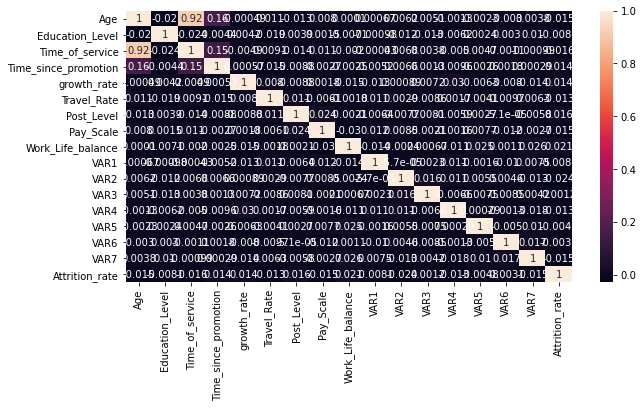

In [156]:
sbn.heatmap(data.corr(),annot=True)

In [ ]:
Observation :
    All the X factors are equally contributed and linearity to traget becomes very low.

In [ ]:
Multi Collinear :  

Time of service and Time since promotion
age and Time since promotion
age and Time of service - High colliner than other variable. 

In [157]:
data.corr()['Attrition_rate']

Age                    -0.015498
Education_Level        -0.008143
Time_of_service        -0.016447
Time_since_promotion    0.013880
growth_rate             0.014247
Travel_Rate            -0.012608
Post_Level              0.016402
Pay_Scale              -0.015236
Work_Life_balance       0.020746
VAR1                   -0.008073
VAR2                   -0.023991
VAR3                    0.001245
VAR4                   -0.013120
VAR5                   -0.004770
VAR6                   -0.003130
VAR7                   -0.015299
Attrition_rate          1.000000
Name: Attrition_rate, dtype: float64

In [217]:
data.groupby('Gender').mean()

,Age,Education_Level,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate,AgeImputed
Gender,,,,,,,,,,,,,,,,,,
F,39.694007,3.196337,13.390644,2.392503,47.21277,0.813591,2.793735,6.028263,2.391185,3.081479,0.012418,-0.013630,1.899659,2.824033,7.101506,3.252140,0.184936,13.390644
M,39.649334,3.203704,13.404709,2.359067,46.72126,0.830688,2.801587,6.014699,2.378281,3.099808,-0.010975,0.005137,1.890808,2.849928,7.121934,3.246032,0.195706,13.404709


In [225]:
data.groupby('Unit',axis=0).mean()

,Age,Education_Level,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate,AgeImputed
Unit,,,,,,,,,,,,,,,,,,
Accounting and Finance,38.910938,3.228277,12.833581,2.310751,47.234168,0.793814,2.804124,6.030928,2.446903,3.151694,0.016175,0.047379,1.916667,2.896907,7.189985,3.207658,0.187362,12.833581
Human Resource Management,39.411157,3.239766,12.873016,2.415205,48.458090,0.824561,2.744639,6.029240,2.333333,3.152047,-0.055804,0.094080,1.902748,2.805068,7.072125,3.191033,0.184617,12.873016
IT,39.693139,3.154865,13.294912,2.383597,46.646969,0.830871,2.786551,5.990826,2.411735,3.086093,0.000765,0.001197,1.874224,2.836984,7.110036,3.247071,0.180985,13.294912
Logistics,39.952903,3.185680,13.750781,2.421723,46.583131,0.814927,2.827670,5.988436,2.372036,3.090413,0.036621,-0.008387,1.912483,2.831917,7.135922,3.236650,0.184379,13.750781
Marketing,41.257525,3.257053,14.317152,2.423197,47.968652,0.780564,2.849530,6.115987,2.386792,3.062696,0.032232,-0.089690,1.841379,2.912226,7.153605,3.288401,0.191922,14.317152
Operarions,39.834737,3.249008,13.437437,2.353175,47.249008,0.817460,2.746032,6.086481,2.381944,3.059524,-0.035579,-0.019403,1.895028,2.793651,7.123016,3.274802,0.197777,13.437437
Production,38.636691,3.219178,13.214789,2.332192,45.551370,0.801370,2.750000,5.976027,2.333333,3.082192,-0.095348,-0.036148,1.857678,2.828767,7.041096,3.277397,0.190742,13.214789
Purchasing,39.435556,3.193277,13.176638,2.389356,47.256303,0.799720,2.719888,6.022440,2.397183,3.098039,0.043084,-0.047120,1.869832,2.781513,7.126050,3.294118,0.199565,13.176638
Quality,39.046763,3.234483,13.554007,2.362069,46.034483,0.806897,2.889655,6.062069,2.334483,3.117241,-0.043388,-0.045280,1.916031,2.779310,7.079310,3.282759,0.185676,13.554007


In [158]:
data.shape

(10000, 24)

In [ ]:
    pd.set_option("display.max_columns", 20)
data[numerical_columns]

# EDA

Basically All the company has some core values which used to share good enablement. so that, we need to doube 
click comanny and see which department has more attrition rate.

In [339]:
def AttrPercentageBar(x, y,z,w,h):
    matplotlib.rcParams["figure.figsize"] = (w,h)
    cross = pd.crosstab(data[x],data[y])
    cross.div(cross.sum(1),axis = 0).plot(kind = "bar", stacked = z, rot=60)

In [ ]:
# When we see the stacked bar all them looks similar irrespective of rating if closely look into security department comparitively 

# Positive Insights :
# less percentage with low work life balance and high percentage in high work life balance 

# Negative Insights 
# high  percentage with low work life balance and less percentage in high work life balance 

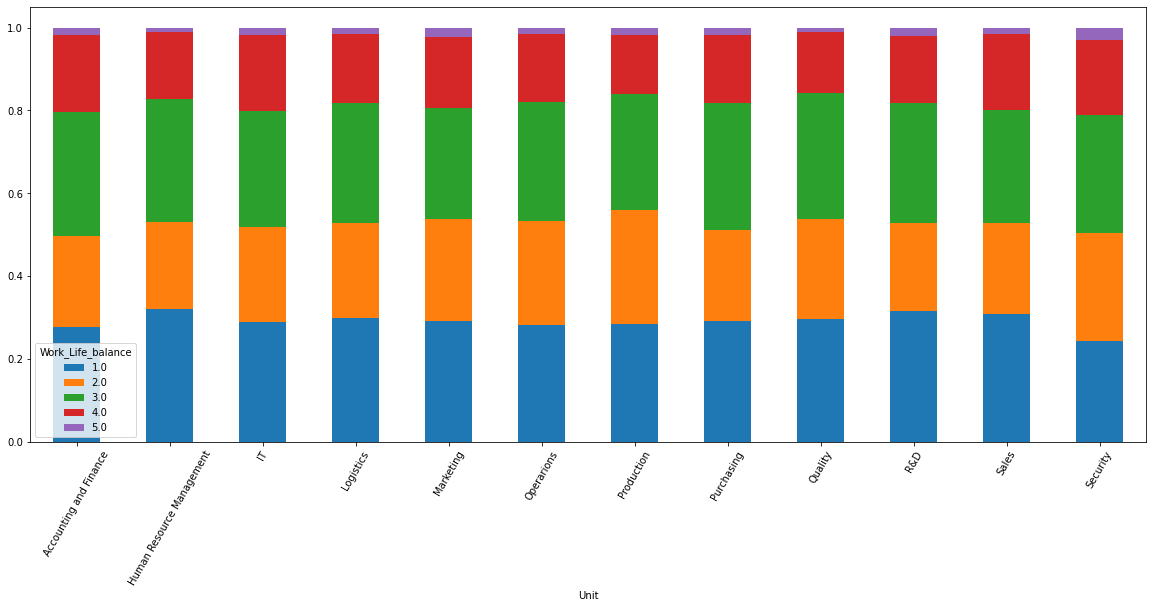

In [340]:
AttrPercentageBar("Unit", "Work_Life_balance",True,20,8)

In [ ]:
Ignore: Dont have much insights on gender based.

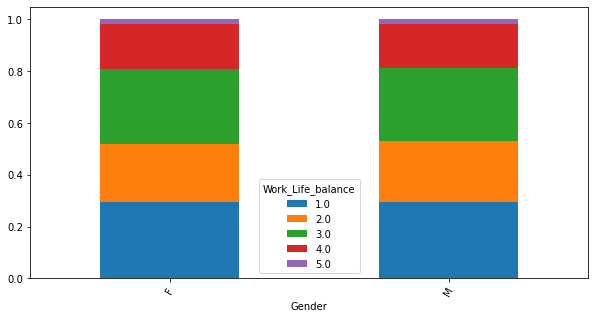

In [289]:
AttrPercentageBar("Gender", "Work_Life_balance",True,10,5)

In [ ]:
This insights trying  to help that when pay scale is high/low that doesn't mean  work life  balance is good.


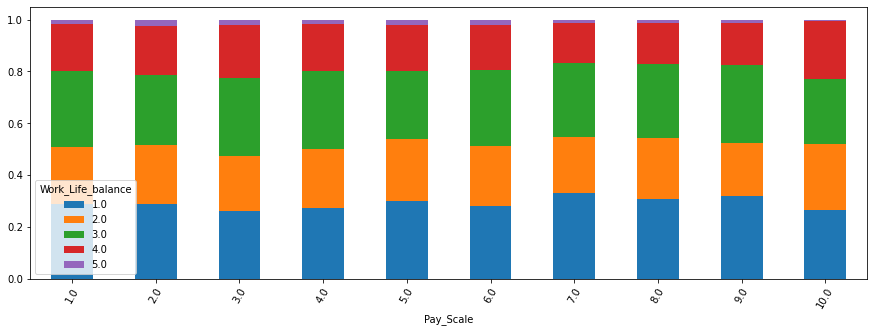

In [306]:
AttrPercentageBar("Pay_Scale", "Work_Life_balance",True,15,5)

In [ ]:
This insihgts that make an understanding compensation and benifits wouldn't 

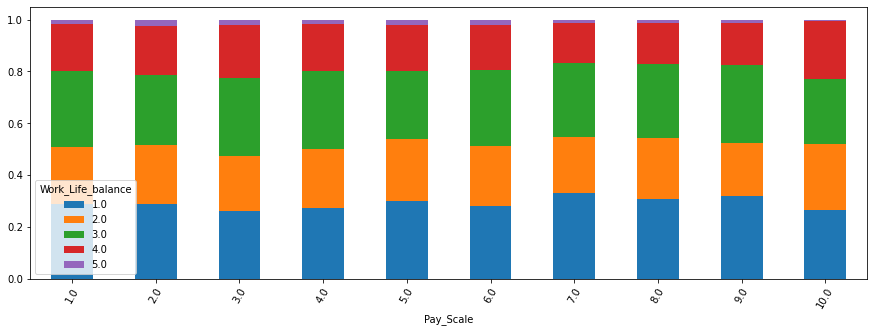

In [313]:
AttrPercentageBar("Pay_Scale", "Work_Life_balance",True,15,5)

In [318]:
def AttrPercentageBox(x,y,z):
    sbn.boxplot(x =train[x],y = train[y],hue=train[z])

<AxesSubplot:xlabel='Compensation_and_Benefits', ylabel='Attrition_rate'>

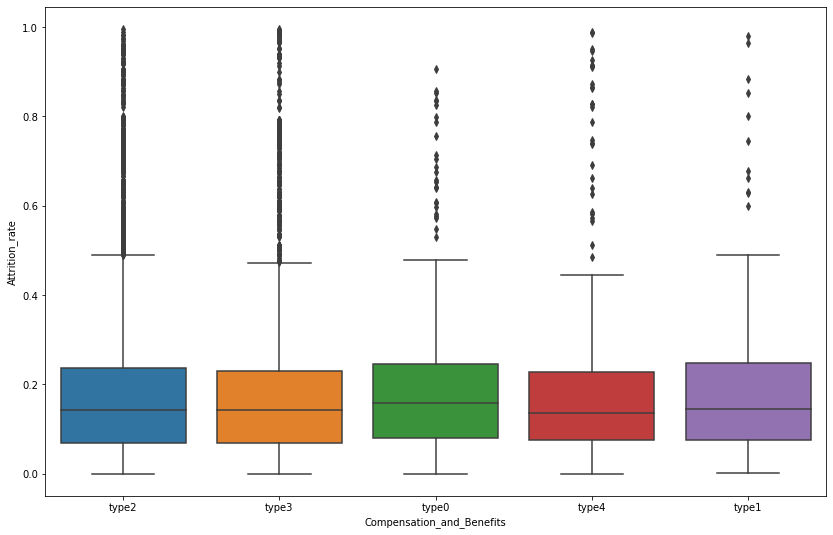

In [328]:
sbn.boxplot(x =train['Compensation_and_Benefits'],y = train['Attrition_rate'])

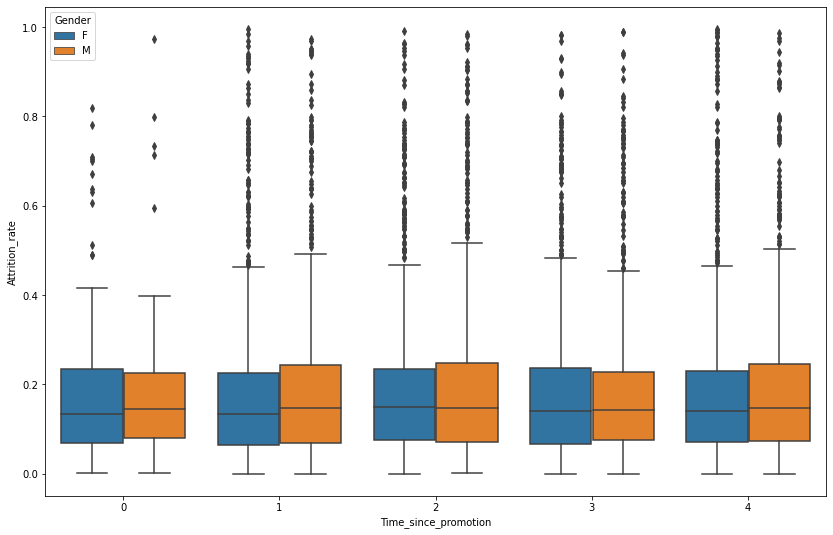

In [329]:
plt.rcParams["figure.figsize"] = [14,9]
AttrPercentageBox('Time_since_promotion','Attrition_rate','Gender')

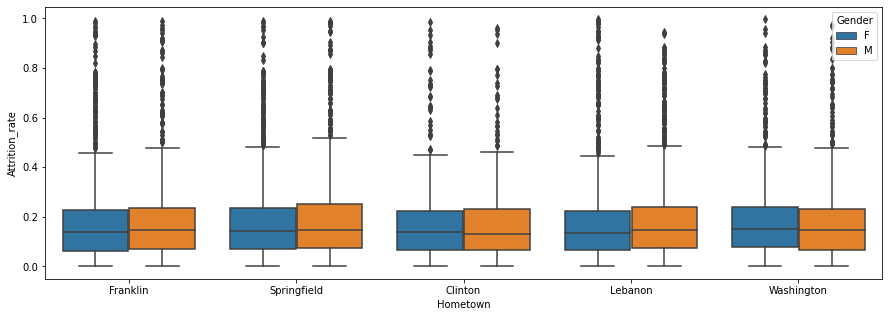

In [343]:
AttrPercentageBox('Hometown','Attrition_rate', 'Gender')

<AxesSubplot:xlabel='Gender', ylabel='count'>

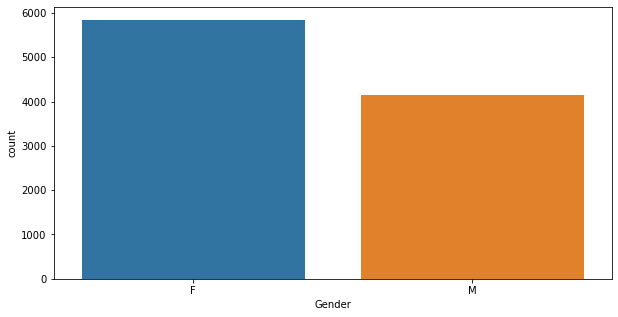

In [228]:
sbn.countplot(x='Gender',data=data)

In [ ]:
def plotbivariate_percentage(x, y):
    cross = pd.crosstab(data[x],data[y])
    cross.div(cross.sum(1),axis = 0).plot(kind = "bar", stacked = "True")

<AxesSubplot:xlabel='Gender'>

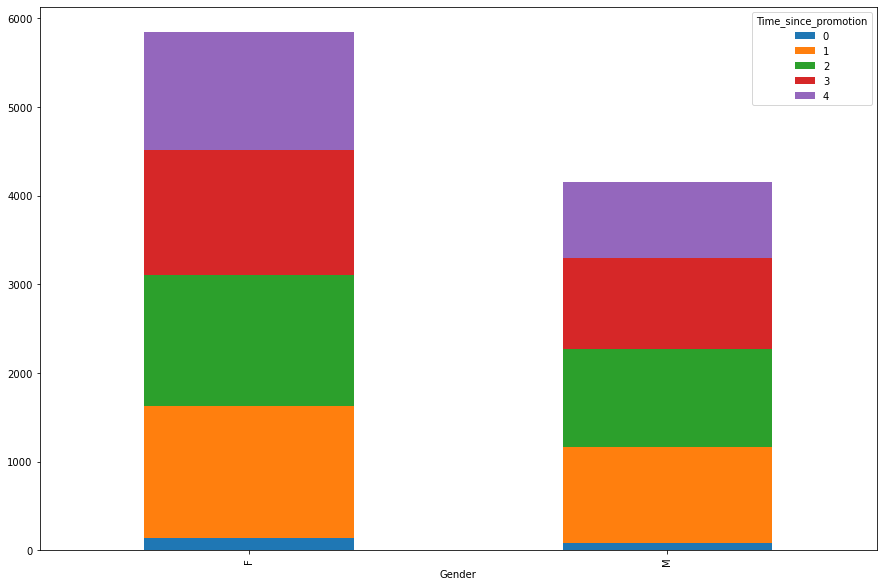

In [246]:
pd.crosstab(data['Gender'],data['Time_since_promotion']).plot(kind = "bar", stacked = "True")

<AxesSubplot:xlabel='Time_since_promotion', ylabel='Post_Level'>

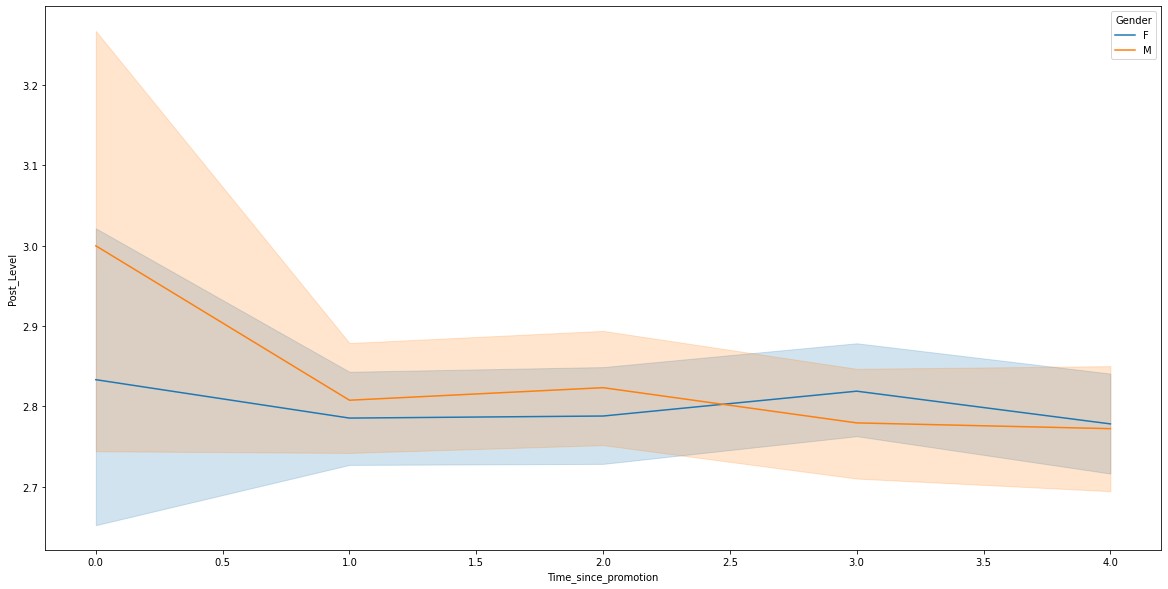

In [336]:
matplotlib.rcParams["figure.figsize"] = (20,10)

sbn.lineplot(x='Time_since_promotion',y='Post_Level',data=data,hue='Gender')

In [337]:
pd.crosstab(data['Gender'],data['Time_since_promotion']).T

Gender,F,M
Time_since_promotion,,
0,138,86
1,1492,1082
2,1477,1104
3,1409,1025
4,1326,861


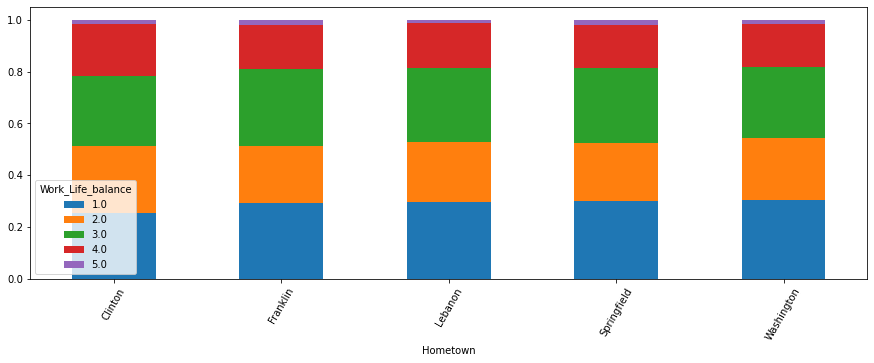

In [341]:
AttrPercentageBar("Hometown", "Work_Life_balance",True,15,5)

<AxesSubplot:xlabel='Hometown', ylabel='count'>

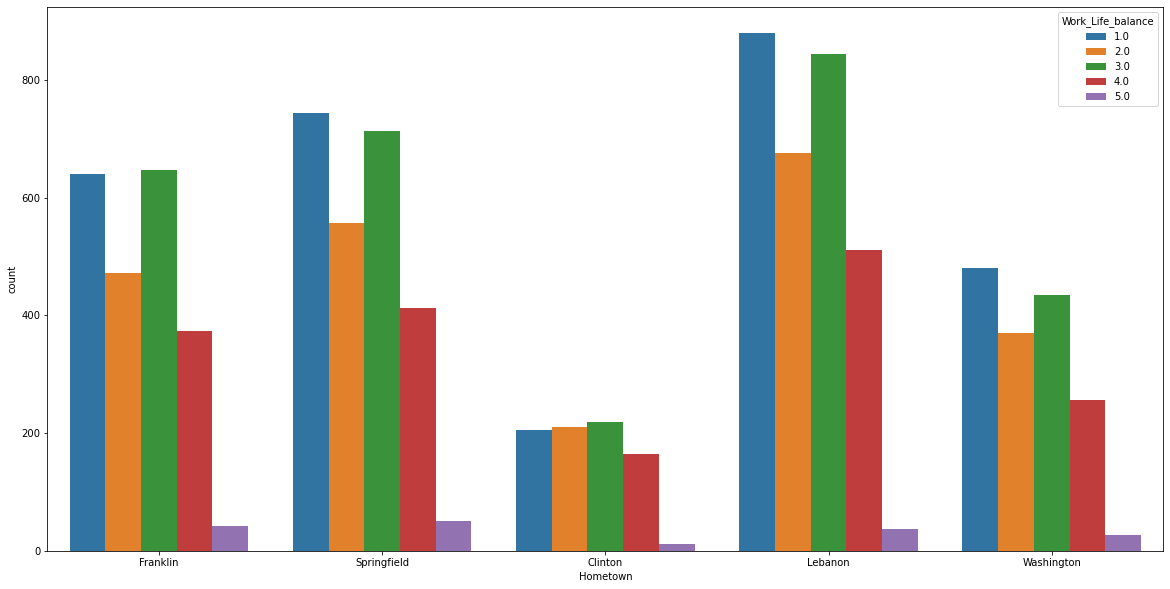

In [338]:
sns.countplot(x='Gender',hue='Work_Life_balance',data=data)

1. Lets see  low rating of Work Life Balance is making an employee  to leave the company

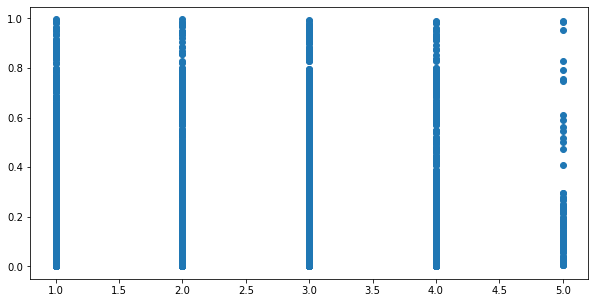

In [67]:
plt.scatter(x='Work_Life_balance',y='Attrition_rate',data=data)

In [ ]:
plt.boxplot(x='Work_Life_balance',data=data)

In [71]:
data[numerical_columns]

,Age,Education_Level,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7
0,42.0,4,4.0,4,33,1,1,7.0,3.0,4,0.7516,1.8688,2.0,4,5,3
1,24.0,3,5.0,4,36,0,3,6.0,4.0,3,-0.9612,-0.4537,2.0,3,5,3
2,58.0,3,27.0,3,51,0,2,8.0,1.0,4,-0.9612,-0.4537,3.0,3,8,3
3,26.0,3,4.0,3,56,1,3,8.0,1.0,3,-1.8176,-0.4537,NaN,3,7,3
4,31.0,1,5.0,4,62,1,3,2.0,3.0,1,0.7516,-0.4537,2.0,2,8,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,32.0,3,3.0,3,38,1,3,6.0,2.0,1,-0.1048,0.7075,1.0,4,7,4
9996,NaN,2,10.0,2,57,1,4,9.0,1.0,3,0.7516,0.7075,3.0,4,8,3
9997,60.0,4,35.0,1,69,0,2,9.0,3.0,3,-1.8176,-0.4537,NaN,4,8,4
9998,51.0,1,23.0,1,30,0,2,6.0,1.0,5,0.7516,-0.4537,2.0,3,9,2


#### univariant Analysis

<AxesSubplot:ylabel='Frequency'>

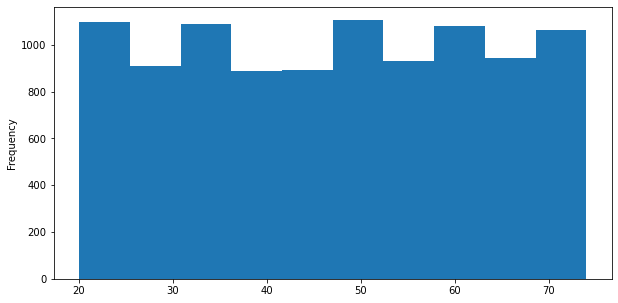

In [74]:
data['growth_rate'].plot(kind='hist')

In [70]:
data[category_columns]

,Employee_ID,Gender,Relationship_Status,Hometown,Unit,Decision_skill_possess,Compensation_and_Benefits
0,EID_23371,F,Married,Franklin,IT,Conceptual,type2
1,EID_18000,M,Single,Springfield,Logistics,Analytical,type2
2,EID_3891,F,Married,Clinton,Quality,Conceptual,type2
3,EID_17492,F,Single,Lebanon,Human Resource Management,Behavioral,type2
4,EID_22534,F,Married,Springfield,Logistics,Conceptual,type3
...,...,...,...,...,...,...,...
9995,EID_22547,F,Single,Franklin,Sales,Directive,type2
9996,EID_10066,F,Single,Franklin,Marketing,Conceptual,type2
9997,EID_7126,F,Single,Lebanon,Logistics,Analytical,type3
9998,EID_4929,F,Married,Springfield,IT,Behavioral,type3


<AxesSubplot:xlabel='growth_rate', ylabel='Attrition_rate'>

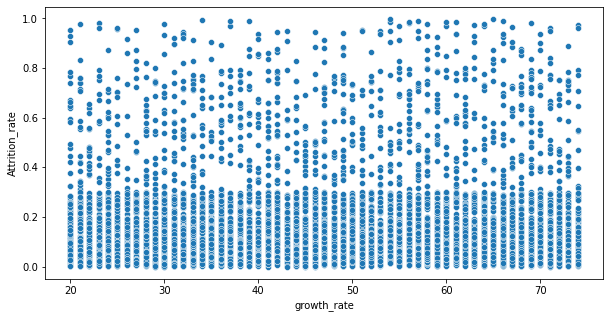

In [75]:
sbn.scatterplot(x='growth_rate',y='Attrition_rate',data=data)

<AxesSubplot:xlabel='Age', ylabel='Time_of_service'>

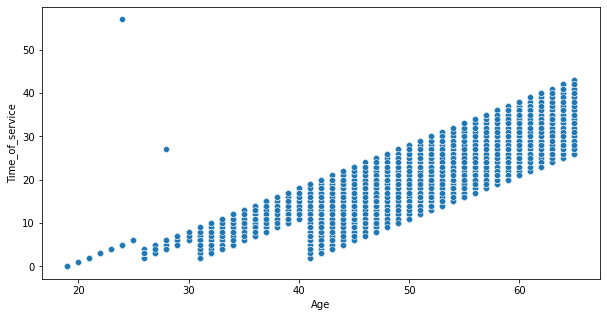

In [208]:
sbn.scatterplot(x='Age',y='Time_of_service',data=data)

In [ ]:
sbn.scatterplot(x='Age',y='Time_of_service',data=data)

# Pre Processing

In [350]:
pd.set_option("display.max_rows", 30)

data.isna().sum()

Employee_ID                    0
Gender                         0
Age                          413
Education_Level                0
Relationship_Status            0
Hometown                       0
Unit                           0
Decision_skill_possess         0
Time_of_service              144
Time_since_promotion           0
growth_rate                    0
Travel_Rate                    0
Post_Level                     0
Pay_Scale                      9
Compensation_and_Benefits      0
Work_Life_balance             11
VAR1                           0
VAR2                         577
VAR3                           0
VAR4                         656
VAR5                           0
VAR6                           0
VAR7                           0
Attrition_rate                 0
dtype: int64

In [351]:
data[data['Age'].isna()]

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
7,EID_1235,F,NaN,3,Married,Springfield,Sales,Directive,34.0,4,23,1,4,6.0,type3,2.0,3,-0.1048,-0.4537,2.0,3,9,3,0.1169
15,EID_20121,F,NaN,3,Married,Springfield,Logistics,Analytical,0.0,0,32,1,2,6.0,type2,2.0,3,0.7516,-1.6150,1.0,3,8,3,0.1331
25,EID_3901,F,NaN,2,Married,Washington,Marketing,Directive,15.0,1,58,1,3,3.0,type2,1.0,3,-0.1048,-0.4537,1.0,4,8,2,0.8727
40,EID_17527,F,NaN,2,Married,Springfield,IT,Conceptual,4.0,1,72,2,5,6.0,type3,2.0,3,-1.8176,0.7075,2.0,5,6,2,0.0618
43,EID_1433,M,NaN,3,Married,Springfield,Logistics,Conceptual,19.0,3,51,1,2,4.0,type2,2.0,5,0.7516,1.8688,2.0,3,8,3,0.1571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6945,EID_20301,F,NaN,3,Single,Springfield,Operarions,Conceptual,17.0,1,32,1,2,9.0,type2,2.0,4,-1.8176,-0.4537,2.0,4,8,3,0.1296
6969,EID_18566,F,NaN,1,Single,Washington,R&D,Conceptual,4.0,2,45,0,5,8.0,type3,4.0,3,0.7516,-1.6150,3.0,4,6,3,0.0986
6981,EID_25181,M,NaN,3,Married,Springfield,Logistics,Behavioral,17.0,3,58,1,3,4.0,type2,1.0,4,1.6081,-1.6150,NaN,5,8,5,0.1954
6986,EID_17099,M,NaN,4,Single,Franklin,Human Resource Management,Directive,3.0,1,59,0,2,5.0,type2,2.0,3,0.7516,0.7075,1.0,3,5,4,0.1041


In [104]:

data.groupby(["Age","Gender"]).growth_rate.mean()

Age   Gender
19.0  F         48.721805
      M         49.300000
20.0  F         48.918919
      M         46.630769
21.0  F         47.201493
                  ...    
63.0  M         45.080000
64.0  F         52.314286
      M         48.745455
65.0  F         48.094488
      M         45.697674
Name: growth_rate, Length: 94, dtype: float64

In [108]:

train.groupby(['Compensation_and_Benefits','Gender','Age']).Attrition_rate.mean()

Compensation_and_Benefits  Gender  Age 
type0                      F       19.0    0.345133
                                   21.0    0.126500
                                   22.0    0.209200
                                   23.0    0.389700
                                   24.0    0.143600
                                             ...   
type4                      M       58.0    0.137800
                                   59.0    0.231433
                                   60.0    0.090133
                                   61.0    0.061950
                                   63.0    0.077550
Name: Attrition_rate, Length: 422, dtype: float64

In [ ]:
data['Age'].isna().sum()

In [456]:
pd.set_option("display.max_rows", 20)

Employee_age_imputation =  data.pivot_table(values="Age", index = ["Time_of_service"])
Employee_Service_imputation =  data.pivot_table(values="Time_of_service", index = ["Age"])


In [609]:
pd.set_option("display.max_rows", 100)

#Employee_age_imputation = data.pivot_table(values="Age", columns=["Time_of_service"]).T

#Employee_age_imputation
Employee_Service_imputation =  data.pivot_table(values="Time_of_service", index = ["Age"])


In [ ]:
Employee_Service_imputation

In [611]:
Selfimputer = data[data['Time_of_service'].notna()]
SelfServiceimputer = data[data['Age'].notna()]

In [601]:
Selfimputer = Selfimputer['Time_of_service']

In [614]:
SelfServiceimputer = Selfimputer['Age']

In [615]:
SelfServiceimputer 

0       42.000000
1       24.000000
2       58.000000
3       26.000000
4       31.000000
          ...    
9995    32.000000
9996    27.017157
9997    60.000000
9998    51.000000
9999    45.000000
Name: Age, Length: 9804, dtype: float64

In [ ]:
Employee_age_imputation.loc[Selfimputer,'Age']

In [ ]:
Employee_Service_imputation

In [619]:
Employee_Service_imputation.loc[SelfServiceimputer,'Time_of_service']

Age
42.000000    12.000000
24.000000     5.000000
58.000000    27.472393
26.000000     2.940199
31.000000     5.177936
               ...    
32.000000     6.405303
27.017157    13.258865
60.000000    29.452381
51.000000    19.826087
45.000000    14.736842
Name: Time_of_service, Length: 9804, dtype: float64

 # Self Imputer

In [651]:
def selfImpute(val,idx):
    Imputer =  data.pivot_table(values=val,index = [idx])
    Selfimputer = data[data[idx].notna()]
    Selfimputer = Selfimputer[val]
    for i in Selfimputer:
        return data2[val].fillna(Imputer.loc[i,val],inplace= True)
    
    

In [ ]:
data.isna().sum()

In [ ]:
Selfimputer = data[data[idx].notna()]
    Selfimputer = Selfimputer[val]
    for i in Selfimputer:
        return data2[val].fillna(Imputer.loc[i,val],inplace= True)

In [661]:
data.groupby('Post_Level').Pay_Scale.mean()

Post_Level
1    5.930033
2    6.040589
3    5.988453
4    6.070850
5    6.162722
Name: Pay_Scale, dtype: float64

In [688]:
Selfimputer = data[data['Post_Level'].notna()]
Selfimputer = Selfimputer['Pay_Scale']
Selfimputer

0       7.0
1       6.0
2       8.0
3       8.0
4       2.0
       ... 
9995    6.0
9996    9.0
9997    9.0
9998    6.0
9999    8.0
Name: Pay_Scale, Length: 10000, dtype: float64

# PayScale Imputer 

In [711]:
Payscale_table =  data.pivot_table(values='Pay_Scale',index ='growth_rate',columns='Post_Level', aggfunc=(lambda x: mode(x).mode[0]))

In [ ]:
Payscale

In [729]:
paytest = data[data["Work_Life_balance"].isna()].head(1000)
paytest

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
728,EID_12062,M,35.0,3,Single,Washington,Logistics,Behavioral,12.0,3,39,1,3,6.0,type2,NaN,3,0.7516,0.7075,2.0,2,9,4,0.0856
902,EID_11146,F,37.0,1,Married,Lebanon,IT,Analytical,10.0,1,21,1,4,7.0,type3,NaN,3,1.6081,0.7075,1.0,2,8,3,0.1206
1252,EID_20549,M,42.0,3,Single,Springfield,Purchasing,Directive,12.0,2,22,1,3,9.0,type3,NaN,3,0.7516,0.7075,NaN,2,6,3,0.0476
1378,EID_19310,F,21.0,4,Single,Franklin,Sales,Directive,2.0,2,39,0,1,5.0,type2,NaN,2,NaN,-0.4537,2.0,3,7,4,0.0617
1634,EID_6814,F,43.0,5,Single,Springfield,Purchasing,Conceptual,14.0,2,36,2,2,3.0,type2,NaN,3,NaN,0.7075,2.0,4,6,5,0.0709
2101,EID_25336,M,52.0,4,Single,Franklin,Logistics,Behavioral,25.0,1,24,0,5,8.0,type2,NaN,3,0.7516,-0.4537,2.0,4,7,5,0.2981
2971,EID_4230,F,64.0,2,Married,Springfield,IT,Behavioral,40.0,4,46,0,3,10.0,type2,NaN,3,1.6081,0.7075,2.0,4,7,5,0.1322
3954,EID_23012,F,37.0,4,Single,Springfield,Purchasing,Conceptual,10.0,2,71,0,1,8.0,type3,NaN,3,1.6081,-0.4537,3.0,3,6,3,0.1744
4532,EID_19982,F,30.0,4,Single,Lebanon,Production,Behavioral,8.0,4,59,1,4,2.0,type2,NaN,4,-1.8176,-1.6150,2.0,4,6,3,0.5131
4735,EID_12687,F,29.0,1,Married,Washington,Purchasing,Behavioral,6.0,4,64,0,4,4.0,type0,NaN,3,-0.9612,0.7075,3.0,4,8,3,0.1517


In [730]:
Worklife_table.loc[paytest["Time_of_service"], paytest["Compensation_and_Benefits"]]

Compensation_and_Benefits,type2,type3,type3,type2,type2,type2,type2,type3,type2,type0,type0,type3,type2,type3,type3,type3
Time_of_service,,,,,,,,,,,,,,,,
12.0,3.0,1.0,1.0,3.0,3.0,3.0,3.0,1.0,3.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0
10.0,3.0,1.0,1.0,3.0,3.0,3.0,3.0,1.0,3.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0
12.0,3.0,1.0,1.0,3.0,3.0,3.0,3.0,1.0,3.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0
2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,4.0,4.0,1.0,1.0,1.0,1.0,1.0
14.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0
25.0,3.0,1.0,1.0,3.0,3.0,3.0,3.0,1.0,3.0,3.0,3.0,1.0,3.0,1.0,1.0,1.0
40.0,1.0,3.0,3.0,1.0,1.0,1.0,1.0,3.0,1.0,3.0,3.0,3.0,1.0,3.0,3.0,3.0
10.0,3.0,1.0,1.0,3.0,3.0,3.0,3.0,1.0,3.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0
8.0,1.0,3.0,3.0,1.0,1.0,1.0,1.0,3.0,1.0,3.0,3.0,3.0,1.0,3.0,3.0,3.0


In [714]:
def PayScaleImputer(x):
    return Payscale_table.loc[x["growth_rate"], x["Post_Level"]]

In [731]:
def WorkLifeBalance(x):
    return Worklife_table.loc[x["Time_of_service"], x["Compensation_and_Benefits"]]

In [724]:
Worklife_table =  data.pivot_table(values='Work_Life_balance',index ='Time_of_service',columns='Compensation_and_Benefits', aggfunc=(lambda x: mode(x).mode[0]))

In [ ]:
Worklife_table

In [732]:
# Payscale Imputer

In [715]:
data["Pay_Scale"].fillna(data[data["Pay_Scale"].isna()].apply(PayScaleImputer, axis= 1), inplace = True)

In [733]:
data["Work_Life_balance"].fillna(data[data["Work_Life_balance"].isna()].apply(WorkLifeBalance, axis= 1), inplace = True)

In [759]:
data.isna().sum()

Employee_ID                     0
Gender                          0
Age                             0
Education_Level                 0
Relationship_Status             0
Hometown                        0
Unit                            0
Decision_skill_possess          0
Time_of_service                 0
Time_since_promotion            0
growth_rate                     0
Travel_Rate                     0
Post_Level                      0
Pay_Scale                       0
Compensation_and_Benefits       0
Work_Life_balance               0
VAR1                            0
VAR2                          794
VAR3                            0
VAR4                          954
VAR5                            0
VAR6                            0
VAR7                            0
Attrition_rate               3000
dtype: int64

###### Need to improve the  fucntion

In [ ]:
from scipy.stats import mode
Imputer = data.pivot_table(values='Pay_Scale',index ='Post_Level', aggfunc=(lambda x: mode(x).mode[0]))
Imputer = Imputer.Pay_Scale.astype(int)
Selfimputer = data[data['Post_Level'].notna()]
Selfimputer = Selfimputer['Pay_Scale']
for i in Selfimputer:
    data2['Pay_Scale'].fillna(Imputer.loc[i,'Pay_Scale'],inplace= True)
    

In [ ]:
for i in Selfimputer:
    print(i)

In [ ]:
for i in Selfimputer:
    data2['Pay_Scale'].fillna(Imputer.loc[i,'Pay_Scale'],inplace= True)

In [735]:
data

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
0,EID_23371,F,42.000000,4,Married,Franklin,IT,Conceptual,4.0,4,33,1,1,7.0,type2,3.0,4,0.7516,1.8688,2.0,4,5,3,0.1841
1,EID_18000,M,24.000000,3,Single,Springfield,Logistics,Analytical,5.0,4,36,0,3,6.0,type2,4.0,3,-0.9612,-0.4537,2.0,3,5,3,0.0670
2,EID_3891,F,58.000000,3,Married,Clinton,Quality,Conceptual,27.0,3,51,0,2,8.0,type2,1.0,4,-0.9612,-0.4537,3.0,3,8,3,0.0851
3,EID_17492,F,26.000000,3,Single,Lebanon,Human Resource Management,Behavioral,4.0,3,56,1,3,8.0,type2,1.0,3,-1.8176,-0.4537,NaN,3,7,3,0.0668
4,EID_22534,F,31.000000,1,Married,Springfield,Logistics,Conceptual,5.0,4,62,1,3,2.0,type3,3.0,1,0.7516,-0.4537,2.0,2,8,2,0.1827
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,EID_22547,F,32.000000,3,Single,Franklin,Sales,Directive,3.0,3,38,1,3,6.0,type2,2.0,1,-0.1048,0.7075,1.0,4,7,4,NaN
9996,EID_10066,F,27.017157,2,Single,Franklin,Marketing,Conceptual,10.0,2,57,1,4,9.0,type2,1.0,3,0.7516,0.7075,3.0,4,8,3,NaN
9997,EID_7126,F,60.000000,4,Single,Lebanon,Logistics,Analytical,35.0,1,69,0,2,9.0,type3,3.0,3,-1.8176,-0.4537,NaN,4,8,4,NaN
9998,EID_4929,F,51.000000,1,Married,Springfield,IT,Behavioral,23.0,1,30,0,2,6.0,type3,1.0,5,0.7516,-0.4537,2.0,3,9,2,NaN


In [757]:
data.isna().sum()

Employee_ID                     0
Gender                          0
Age                             0
Education_Level                 0
Relationship_Status             0
Hometown                        0
Unit                            0
Decision_skill_possess          0
Time_of_service                 0
Time_since_promotion            0
growth_rate                     0
Travel_Rate                     0
Post_Level                      0
Pay_Scale                       0
Compensation_and_Benefits       0
Work_Life_balance               0
VAR1                            0
VAR2                          794
VAR3                            0
VAR4                          954
VAR5                            0
VAR6                            0
VAR7                            0
Attrition_rate               3000
dtype: int64

In [696]:
data[data['Pay_Scale'].isna()]

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
445,EID_4641,M,52.0,3,Married,Clinton,Logistics,Behavioral,15.0,2,29,0,3,NaN,type3,1.0,3,0.7516,-0.4537,3.0,1,7,1,0.1803
1126,EID_16660,M,28.0,3,Married,Lebanon,Logistics,Directive,5.0,1,40,1,3,NaN,type2,3.0,1,0.7516,-1.6150,1.0,3,8,3,0.1154
1378,EID_19310,F,21.0,4,Single,Franklin,Sales,Directive,2.0,2,39,0,1,NaN,type2,NaN,2,NaN,-0.4537,2.0,3,7,4,0.0617
1997,EID_24076,M,35.0,3,Married,Springfield,Logistics,Directive,12.0,1,38,0,5,NaN,type2,3.0,3,-1.8176,0.7075,2.0,2,7,4,0.1047
3083,EID_16076,M,23.0,5,Married,Lebanon,Operarions,Analytical,4.0,1,66,0,3,NaN,type3,3.0,3,-0.9612,0.7075,2.0,3,8,4,0.1841
3777,EID_13589,M,36.0,4,Married,Franklin,IT,Directive,9.0,1,41,1,3,NaN,type2,3.0,3,0.7516,-1.6150,2.0,4,7,3,0.8597
4508,EID_11400,M,33.0,3,Married,Washington,Operarions,Directive,5.0,1,27,0,3,NaN,type2,2.0,2,-0.1048,-0.4537,1.0,3,8,5,0.0838
5958,EID_6740,F,52.0,3,Married,Clinton,Logistics,Conceptual,16.0,2,26,0,4,NaN,type3,4.0,3,0.7516,1.8688,2.0,2,8,2,0.1900
6857,EID_24697,M,47.0,1,Single,Franklin,Sales,Directive,23.0,1,56,1,4,NaN,type2,1.0,3,-0.1048,0.7075,2.0,2,8,3,0.1509
8202,EID_17521,M,24.0,2,Married,Lebanon,Purchasing,Conceptual,5.0,2,20,1,4,NaN,type3,3.0,3,-0.9612,-0.4537,2.0,4,6,3,NaN


In [769]:
from sklearn.impute import SimpleImputer

  
X = data.iloc[:, 17].values
  
# To calculate mean use imputer class
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer = imputer.fit([X])
imputer.transform([X])
#print(X)
data['VAR2'].fillna(pd.Series(X),inplace=True)

In [819]:
data.reset_index().drop(columns="index")

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
0,EID_23371,F,42,4,Married,Franklin,IT,Conceptual,4,4,33,1,1,7.0,type2,3.0,4,0.7516,1.8688,None,4,5,3,0.1841
1,EID_18000,M,24,3,Single,Springfield,Logistics,Analytical,5,4,36,0,3,6.0,type2,4.0,3,-0.9612,-0.4537,None,3,5,3,0.0670
2,EID_3891,F,58,3,Married,Clinton,Quality,Conceptual,27,3,51,0,2,8.0,type2,1.0,4,-0.9612,-0.4537,None,3,8,3,0.0851
3,EID_17492,F,26,3,Single,Lebanon,Human Resource Management,Behavioral,4,3,56,1,3,8.0,type2,1.0,3,-1.8176,-0.4537,None,3,7,3,0.0668
4,EID_22534,F,31,1,Married,Springfield,Logistics,Conceptual,5,4,62,1,3,2.0,type3,3.0,1,0.7516,-0.4537,None,2,8,2,0.1827
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,EID_22547,F,32,3,Single,Franklin,Sales,Directive,3,3,38,1,3,6.0,type2,2.0,1,-0.1048,0.7075,None,4,7,4,NaN
9996,EID_10066,F,27,2,Single,Franklin,Marketing,Conceptual,10,2,57,1,4,9.0,type2,1.0,3,0.7516,0.7075,None,4,8,3,NaN
9997,EID_7126,F,60,4,Single,Lebanon,Logistics,Analytical,35,1,69,0,2,9.0,type3,3.0,3,-1.8176,-0.4537,None,4,8,4,NaN
9998,EID_4929,F,51,1,Married,Springfield,IT,Behavioral,23,1,30,0,2,6.0,type3,1.0,5,0.7516,-0.4537,None,3,9,2,NaN


In [824]:
data3

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
0,EID_23371,F,42.0,4,Married,Franklin,IT,Conceptual,4.0,4,33,1,1,7.0,type2,3.0,4,0.7516,1.8688,2.0,4,5,3,0.1841
1,EID_18000,M,24.0,3,Single,Springfield,Logistics,Analytical,5.0,4,36,0,3,6.0,type2,4.0,3,-0.9612,-0.4537,2.0,3,5,3,0.0670
2,EID_3891,F,58.0,3,Married,Clinton,Quality,Conceptual,27.0,3,51,0,2,8.0,type2,1.0,4,-0.9612,-0.4537,3.0,3,8,3,0.0851
3,EID_17492,F,26.0,3,Single,Lebanon,Human Resource Management,Behavioral,4.0,3,56,1,3,8.0,type2,1.0,3,-1.8176,-0.4537,NaN,3,7,3,0.0668
4,EID_22534,F,31.0,1,Married,Springfield,Logistics,Conceptual,5.0,4,62,1,3,2.0,type3,3.0,1,0.7516,-0.4537,2.0,2,8,2,0.1827
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,EID_22547,F,32.0,3,Single,Franklin,Sales,Directive,3.0,3,38,1,3,6.0,type2,2.0,1,-0.1048,0.7075,1.0,4,7,4,NaN
2996,EID_10066,F,NaN,2,Single,Franklin,Marketing,Conceptual,10.0,2,57,1,4,9.0,type2,1.0,3,0.7516,0.7075,3.0,4,8,3,NaN
2997,EID_7126,F,60.0,4,Single,Lebanon,Logistics,Analytical,35.0,1,69,0,2,9.0,type3,3.0,3,-1.8176,-0.4537,NaN,4,8,4,NaN
2998,EID_4929,F,51.0,1,Married,Springfield,IT,Behavioral,23.0,1,30,0,2,6.0,type3,1.0,5,0.7516,-0.4537,2.0,3,9,2,NaN


In [825]:
data3 = data3.reset_index().drop(columns="index")

In [826]:
data['VAR4'] = data3['VAR4']

In [771]:
data['VAR2'].fillna(data['VAR2'].mean(),inplace=True)

In [828]:
data['VAR4'].fillna(round(int(data['VAR4'].mean()+1)),inplace=True)

In [829]:
data

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
0,EID_23371,F,42,4,Married,Franklin,IT,Conceptual,4,4,33,1,1,7.0,type2,3.0,4,0.7516,1.8688,2.0,4,5,3,0.1841
1,EID_18000,M,24,3,Single,Springfield,Logistics,Analytical,5,4,36,0,3,6.0,type2,4.0,3,-0.9612,-0.4537,2.0,3,5,3,0.0670
2,EID_3891,F,58,3,Married,Clinton,Quality,Conceptual,27,3,51,0,2,8.0,type2,1.0,4,-0.9612,-0.4537,3.0,3,8,3,0.0851
3,EID_17492,F,26,3,Single,Lebanon,Human Resource Management,Behavioral,4,3,56,1,3,8.0,type2,1.0,3,-1.8176,-0.4537,2.0,3,7,3,0.0668
4,EID_22534,F,31,1,Married,Springfield,Logistics,Conceptual,5,4,62,1,3,2.0,type3,3.0,1,0.7516,-0.4537,2.0,2,8,2,0.1827
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,EID_22547,F,32,3,Single,Franklin,Sales,Directive,3,3,38,1,3,6.0,type2,2.0,1,-0.1048,0.7075,1.0,4,7,4,NaN
9996,EID_10066,F,27,2,Single,Franklin,Marketing,Conceptual,10,2,57,1,4,9.0,type2,1.0,3,0.7516,0.7075,3.0,4,8,3,NaN
9997,EID_7126,F,60,4,Single,Lebanon,Logistics,Analytical,35,1,69,0,2,9.0,type3,3.0,3,-1.8176,-0.4537,2.0,4,8,4,NaN
9998,EID_4929,F,51,1,Married,Springfield,IT,Behavioral,23,1,30,0,2,6.0,type3,1.0,5,0.7516,-0.4537,2.0,3,9,2,NaN


In [746]:
imputer

SimpleImputer()

In [741]:
X = data.iloc[:, 17].values
X

array([ 0.7516, -0.9612, -0.9612, ..., -1.8176,  0.7516,  0.7516])

In [793]:
data.isna().sum()

Employee_ID                     0
Gender                          0
Age                             0
Education_Level                 0
Relationship_Status             0
Hometown                        0
Unit                            0
Decision_skill_possess          0
Time_of_service                 0
Time_since_promotion            0
growth_rate                     0
Travel_Rate                     0
Post_Level                      0
Pay_Scale                       0
Compensation_and_Benefits       0
Work_Life_balance               0
VAR1                            0
VAR2                            0
VAR3                            0
VAR4                            0
VAR5                            0
VAR6                            0
VAR7                            0
Attrition_rate               3000
dtype: int64

In [778]:
data.shape

(10000, 24)

In [ ]:
selfImpute('Pay_Scale','Post_Level')

In [466]:
Employee_age_imputation.loc[40.0]

Age    63.565217
Name: 40.0, dtype: float64

In [519]:
for i in Employee_age_imputation:
    print(i)

Age


In [ ]:
for i in Employee_age_imputation.loc[Selfimputer,'Age']:
    print(i)

In [562]:
data.shape

(7010, 24)

In [577]:
data2 = data.copy()

In [624]:
for i in SelfServiceimputer:
    data2["Time_of_service"].fillna(Employee_Service_imputation.loc[i,'Time_of_service'],inplace= True)


In [ ]:
for i in Selfimputer:
    data2["Age"].fillna(Employee_age_imputation.loc[i,'Age'],inplace= True)


In [539]:
data['Employee_ID']

0      EID_23371
1      EID_18000
2       EID_3891
3      EID_17492
4      EID_22534
         ...    
54      EID_1297
97     EID_22742
101    EID_13859
116    EID_17036
144    EID_25188
Name: Employee_ID, Length: 7010, dtype: object

In [625]:
data2["Time_of_service"].isna().sum()

0

In [579]:
data2["Age"].isna().sum()

0

In [544]:
data2[data2['Time_of_service']== 4.0]

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
0,EID_23371,F,42.000000,4,Married,Franklin,IT,Conceptual,4.0,4,33,1,1,7.0,type2,3.0,4,0.7516,1.8688,2.0,4,5,3,0.1841
3,EID_17492,F,26.000000,3,Single,Lebanon,Human Resource Management,Behavioral,4.0,3,56,1,3,8.0,type2,1.0,3,-1.8176,-0.4537,NaN,3,7,3,0.0668
13,EID_17644,F,23.000000,4,Single,Washington,Logistics,Conceptual,4.0,2,70,1,3,8.0,type2,3.0,4,-0.1048,-1.6150,2.0,4,8,3,0.1696
40,EID_17527,F,27.017157,2,Married,Springfield,IT,Conceptual,4.0,1,72,2,5,6.0,type3,2.0,3,-1.8176,0.7075,2.0,5,6,2,0.0618
49,EID_15197,M,31.000000,4,Single,Springfield,Sales,Behavioral,4.0,2,48,0,5,4.0,type2,1.0,1,-0.1048,0.7075,NaN,3,8,3,0.2300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6977,EID_24726,F,31.000000,5,Married,Springfield,Operarions,Directive,4.0,4,70,2,5,7.0,type3,2.0,2,0.7516,0.7075,2.0,3,5,4,0.1458
6989,EID_20243,F,28.000000,1,Married,Lebanon,R&D,Conceptual,4.0,4,26,0,1,8.0,type2,3.0,3,-0.9612,-2.7762,3.0,3,5,3,0.2541
6992,EID_19922,F,26.000000,1,Married,Franklin,Accounting and Finance,Analytical,4.0,2,52,1,3,3.0,type2,1.0,1,-0.1048,0.7075,2.0,3,8,3,0.2238
6995,EID_16328,F,23.000000,5,Married,Franklin,Operarions,Behavioral,4.0,1,20,1,2,6.0,type3,3.0,1,0.7516,-0.4537,2.0,3,7,3,0.7839


In [537]:
data[data["Age"].isna()]

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
7,EID_1235,F,NaN,3,Married,Springfield,Sales,Directive,34.0,4,23,1,4,6.0,type3,2.0,3,-0.1048,-0.4537,2.0,3,9,3,0.1169
15,EID_20121,F,NaN,3,Married,Springfield,Logistics,Analytical,0.0,0,32,1,2,6.0,type2,2.0,3,0.7516,-1.6150,1.0,3,8,3,0.1331
25,EID_3901,F,NaN,2,Married,Washington,Marketing,Directive,15.0,1,58,1,3,3.0,type2,1.0,3,-0.1048,-0.4537,1.0,4,8,2,0.8727
40,EID_17527,F,NaN,2,Married,Springfield,IT,Conceptual,4.0,1,72,2,5,6.0,type3,2.0,3,-1.8176,0.7075,2.0,5,6,2,0.0618
43,EID_1433,M,NaN,3,Married,Springfield,Logistics,Conceptual,19.0,3,51,1,2,4.0,type2,2.0,5,0.7516,1.8688,2.0,3,8,3,0.1571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54,EID_1297,M,NaN,4,Married,Springfield,IT,Directive,24.0,4,52,0,2,5.0,type3,3.0,3,-1.8176,-0.4537,1.0,3,9,4,0.0449
97,EID_22742,F,NaN,4,Married,Lebanon,Human Resource Management,Analytical,19.0,4,27,1,3,5.0,type2,4.0,4,-1.8176,-0.4537,3.0,2,5,3,0.0163
101,EID_13859,M,NaN,4,Married,Lebanon,Operarions,Behavioral,3.0,2,36,0,3,5.0,type2,2.0,4,0.7516,0.7075,3.0,3,5,3,0.1309
116,EID_17036,M,NaN,2,Married,Franklin,Operarions,Directive,5.0,3,47,0,1,6.0,type4,1.0,3,-0.1048,0.7075,NaN,4,6,3,0.2365


In [545]:
data2[data2['Employee_ID']== 'EID_20121']

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
15,EID_20121,F,27.017157,3,Married,Springfield,Logistics,Analytical,0.0,0,32,1,2,6.0,type2,2.0,3,0.7516,-1.615,1.0,3,8,3,0.1331
15,EID_20121,F,27.017157,3,Married,Springfield,Logistics,Analytical,0.0,0,32,1,2,6.0,type2,2.0,3,0.7516,-1.615,1.0,3,8,3,0.1331


In [581]:
data2.duplicated().sum()

0

In [ ]:

Employee_age_imputation.loc[test['Age'],:111111]

In [557]:
data2.value_counts().sum()

5692

In [ ]:
data[data['Time_of_service'] >= 

In [440]:
pd.set_option("display.max_rows", 10)

test = data[data["Age"].isna()].head(10)
test

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
7,EID_1235,F,NaN,3,Married,Springfield,Sales,Directive,34.0,4,23,1,4,6.0,type3,2.0,3,-0.1048,-0.4537,2.0,3,9,3,0.1169
15,EID_20121,F,NaN,3,Married,Springfield,Logistics,Analytical,0.0,0,32,1,2,6.0,type2,2.0,3,0.7516,-1.6150,1.0,3,8,3,0.1331
25,EID_3901,F,NaN,2,Married,Washington,Marketing,Directive,15.0,1,58,1,3,3.0,type2,1.0,3,-0.1048,-0.4537,1.0,4,8,2,0.8727
40,EID_17527,F,NaN,2,Married,Springfield,IT,Conceptual,4.0,1,72,2,5,6.0,type3,2.0,3,-1.8176,0.7075,2.0,5,6,2,0.0618
43,EID_1433,M,NaN,3,Married,Springfield,Logistics,Conceptual,19.0,3,51,1,2,4.0,type2,2.0,5,0.7516,1.8688,2.0,3,8,3,0.1571
54,EID_1297,M,NaN,4,Married,Springfield,IT,Directive,24.0,4,52,0,2,5.0,type3,3.0,3,-1.8176,-0.4537,1.0,3,9,4,0.0449
97,EID_22742,F,NaN,4,Married,Lebanon,Human Resource Management,Analytical,19.0,4,27,1,3,5.0,type2,4.0,4,-1.8176,-0.4537,3.0,2,5,3,0.0163
101,EID_13859,M,NaN,4,Married,Lebanon,Operarions,Behavioral,3.0,2,36,0,3,5.0,type2,2.0,4,0.7516,0.7075,3.0,3,5,3,0.1309
116,EID_17036,M,NaN,2,Married,Franklin,Operarions,Directive,5.0,3,47,0,1,6.0,type4,1.0,3,-0.1048,0.7075,NaN,4,6,3,0.2365
144,EID_25188,F,NaN,3,Single,Springfield,R&D,Analytical,18.0,4,69,1,3,4.0,type2,1.0,4,-0.9612,-0.4537,2.0,2,7,2,0.0211


In [496]:
Employee_age_imputation.loc[test["Time_of_service"]]

,Age
Time_of_service,
34.0,60.000000
0.0,19.000000
15.0,45.035928
4.0,27.017157
19.0,49.400000
24.0,54.635593
19.0,49.400000
3.0,25.089888
5.0,27.712788


In [558]:
Employee_age_imputation.loc[Selfimputer,'Age']

Time_of_service
4.0     27.017157
5.0     27.712788
27.0    56.872727
4.0     27.017157
5.0     27.712788
          ...    
16.0    46.161765
10.0    38.175879
24.0    54.635593
22.0    51.985294
34.0    60.000000
Name: Age, Length: 6857, dtype: float64

In [502]:
Employee_age_imputation.loc[Selfimputer,'Age']

Time_of_service
4.0     27.017157
5.0     27.712788
27.0    56.872727
4.0     27.017157
5.0     27.712788
          ...    
16.0    46.161765
10.0    38.175879
24.0    54.635593
22.0    51.985294
34.0    60.000000
Name: Age, Length: 6857, dtype: float64

In [481]:
def age_imputation(x):
    return Employee_age_imputation.loc[Selfimputer,'Age']

In [ ]:
data["Age"].fillna(Employee_age_imputation.loc[Selfimputer, inplace = False)

In [509]:
Employee_age_imputation.loc[Selfimputer,'Age']

Time_of_service
4.0     27.017157
5.0     27.712788
27.0    56.872727
4.0     27.017157
5.0     27.712788
          ...    
16.0    46.161765
10.0    38.175879
24.0    54.635593
22.0    51.985294
34.0    60.000000
Name: Age, Length: 6857, dtype: float64

In [352]:
Employee_age_imputation.head()

,Age
Time_of_service,
0.0,19.000000
1.0,20.000000
2.0,23.909320
3.0,25.170769
4.0,27.163934


In [559]:
data.groupby('Time_of_service').Age.mean()

Time_of_service
0.0     19.000000
1.0     20.000000
2.0     24.003534
3.0     25.089888
4.0     27.017157
5.0     27.712788
6.0     28.572266
7.0     34.053942
8.0     34.833977
9.0     36.436548
10.0    38.175879
11.0    39.133333
12.0    40.263736
13.0    41.789189
14.0    42.544379
15.0    45.035928
16.0    46.161765
17.0    46.660870
18.0    48.527027
19.0    49.400000
20.0    50.318519
21.0    51.862595
22.0    51.985294
23.0    53.234783
24.0    54.635593
25.0    54.783019
26.0    56.628571
27.0    56.872727
28.0    57.407767
29.0    58.645570
30.0    57.680412
31.0    58.551282
32.0    59.016667
33.0    60.130435
34.0    60.000000
35.0    60.625000
36.0    61.775510
37.0    61.612245
38.0    61.866667
39.0    63.370370
40.0    63.565217
41.0    64.533333
42.0    64.705882
43.0    65.000000
Name: Age, dtype: float64

In [ ]:
mean_value=gfg['G2'].mean()
  
# Replace NaNs in column S2 with the
# mean of values in the same column
gfg['G2'].fillna(value=mean_value, inplace=True)

In [191]:
Age_impute = data.groupby('Time_of_service').Age.median()
data2['Age'].fillna(value=Age_impute,inplace=True)


In [180]:
#data2 = data.copy() 
data2['Time_of_service'] = data2["Time_of_service"].fillna(data2.groupby('Age').Age.median())

In [ ]:
data2["Time_of_service"].fillna(data2[data2["Time_of_service"].isnull()].apply(find_visibility, axis= 1), inplace = True)

In [188]:
data2.columns

Index(['Employee_ID', 'Gender', 'Age', 'Education_Level',
       'Relationship_Status', 'Hometown', 'Unit', 'Decision_skill_possess',
       'Time_of_service', 'Time_since_promotion', 'growth_rate', 'Travel_Rate',
       'Post_Level', 'Pay_Scale', 'Compensation_and_Benefits',
       'Work_Life_balance', 'VAR1', 'VAR2', 'VAR3', 'VAR4', 'VAR5', 'VAR6',
       'VAR7', 'Attrition_rate', 'AgeImputed'],
      dtype='object')

In [192]:
data2[data2['Age'].isna()]

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate,AgeImputed
54,EID_1297,M,NaN,4,Married,Springfield,IT,Directive,24.0,4,52,0,2,5.0,type3,3.0,3,-1.8176,-0.4537,1.0,3,9,4,0.0449,24.0
97,EID_22742,F,NaN,4,Married,Lebanon,Human Resource Management,Analytical,19.0,4,27,1,3,5.0,type2,4.0,4,-1.8176,-0.4537,3.0,2,5,3,0.0163,19.0
101,EID_13859,M,NaN,4,Married,Lebanon,Operarions,Behavioral,3.0,2,36,0,3,5.0,type2,2.0,4,0.7516,0.7075,3.0,3,5,3,0.1309,3.0
116,EID_17036,M,NaN,2,Married,Franklin,Operarions,Directive,5.0,3,47,0,1,6.0,type4,1.0,3,-0.1048,0.7075,NaN,4,6,3,0.2365,5.0
144,EID_25188,F,NaN,3,Single,Springfield,R&D,Analytical,18.0,4,69,1,3,4.0,type2,1.0,4,-0.9612,-0.4537,2.0,2,7,2,0.0211,18.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9932,EID_23044,M,NaN,4,Married,Washington,Quality,Conceptual,13.0,4,47,2,3,7.0,type3,1.0,3,-0.9612,0.7075,NaN,3,8,1,NaN,13.0
9947,EID_24145,M,NaN,3,Single,Springfield,Purchasing,Directive,10.0,3,40,1,1,5.0,type3,1.0,4,0.7516,-1.6150,2.0,2,6,3,NaN,10.0
9955,EID_6218,F,NaN,1,Married,Springfield,R&D,Directive,10.0,2,54,0,2,5.0,type4,5.0,2,0.7516,-0.4537,3.0,3,6,3,NaN,10.0
9982,EID_14759,M,NaN,3,Married,Lebanon,Operarions,Directive,6.0,2,73,1,3,6.0,type2,3.0,4,-0.1048,-0.4537,1.0,3,8,5,NaN,6.0


In [627]:
data = data2

In [ ]:
Employee_age_imputation.loc[test["Time_of_service"], test["Age"]]

In [587]:
data['Age'].isna()

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Name: Age, Length: 10000, dtype: bool

In [773]:
data.isna().sum()

Employee_ID                     0
Gender                          0
Age                             0
Education_Level                 0
Relationship_Status             0
Hometown                        0
Unit                            0
Decision_skill_possess          0
Time_of_service                 0
Time_since_promotion            0
growth_rate                     0
Travel_Rate                     0
Post_Level                      0
Pay_Scale                       0
Compensation_and_Benefits       0
Work_Life_balance               0
VAR1                            0
VAR2                            0
VAR3                            0
VAR4                          954
VAR5                            0
VAR6                            0
VAR7                            0
Attrition_rate               3000
dtype: int64

In [ ]:
data2['Time_of_service'] = 

In [775]:
data.describe()['VAR4'].T

count    9046.000000
mean        1.895976
std         0.533987
min         1.000000
25%         2.000000
50%         2.000000
75%         2.000000
max         3.000000
Name: VAR4, dtype: float64

In [632]:
data[data['Pay_Scale'].isna()]

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
445,EID_4641,M,52.0,3,Married,Clinton,Logistics,Behavioral,15.0,2,29,0,3,NaN,type3,1.0,3,0.7516,-0.4537,3.0,1,7,1,0.1803
1126,EID_16660,M,28.0,3,Married,Lebanon,Logistics,Directive,5.0,1,40,1,3,NaN,type2,3.0,1,0.7516,-1.6150,1.0,3,8,3,0.1154
1378,EID_19310,F,21.0,4,Single,Franklin,Sales,Directive,2.0,2,39,0,1,NaN,type2,NaN,2,NaN,-0.4537,2.0,3,7,4,0.0617
1997,EID_24076,M,35.0,3,Married,Springfield,Logistics,Directive,12.0,1,38,0,5,NaN,type2,3.0,3,-1.8176,0.7075,2.0,2,7,4,0.1047
3083,EID_16076,M,23.0,5,Married,Lebanon,Operarions,Analytical,4.0,1,66,0,3,NaN,type3,3.0,3,-0.9612,0.7075,2.0,3,8,4,0.1841
3777,EID_13589,M,36.0,4,Married,Franklin,IT,Directive,9.0,1,41,1,3,NaN,type2,3.0,3,0.7516,-1.6150,2.0,4,7,3,0.8597
4508,EID_11400,M,33.0,3,Married,Washington,Operarions,Directive,5.0,1,27,0,3,NaN,type2,2.0,2,-0.1048,-0.4537,1.0,3,8,5,0.0838
5958,EID_6740,F,52.0,3,Married,Clinton,Logistics,Conceptual,16.0,2,26,0,4,NaN,type3,4.0,3,0.7516,1.8688,2.0,2,8,2,0.1900
6857,EID_24697,M,47.0,1,Single,Franklin,Sales,Directive,23.0,1,56,1,4,NaN,type2,1.0,3,-0.1048,0.7075,2.0,2,8,3,0.1509
8202,EID_17521,M,24.0,2,Married,Lebanon,Purchasing,Conceptual,5.0,2,20,1,4,NaN,type3,3.0,3,-0.9612,-0.4537,2.0,4,6,3,NaN


In [631]:
data

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
0,EID_23371,F,42.000000,4,Married,Franklin,IT,Conceptual,4.0,4,33,1,1,7.0,type2,3.0,4,0.7516,1.8688,2.0,4,5,3,0.1841
1,EID_18000,M,24.000000,3,Single,Springfield,Logistics,Analytical,5.0,4,36,0,3,6.0,type2,4.0,3,-0.9612,-0.4537,2.0,3,5,3,0.0670
2,EID_3891,F,58.000000,3,Married,Clinton,Quality,Conceptual,27.0,3,51,0,2,8.0,type2,1.0,4,-0.9612,-0.4537,3.0,3,8,3,0.0851
3,EID_17492,F,26.000000,3,Single,Lebanon,Human Resource Management,Behavioral,4.0,3,56,1,3,8.0,type2,1.0,3,-1.8176,-0.4537,NaN,3,7,3,0.0668
4,EID_22534,F,31.000000,1,Married,Springfield,Logistics,Conceptual,5.0,4,62,1,3,2.0,type3,3.0,1,0.7516,-0.4537,2.0,2,8,2,0.1827
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,EID_22547,F,32.000000,3,Single,Franklin,Sales,Directive,3.0,3,38,1,3,6.0,type2,2.0,1,-0.1048,0.7075,1.0,4,7,4,NaN
9996,EID_10066,F,27.017157,2,Single,Franklin,Marketing,Conceptual,10.0,2,57,1,4,9.0,type2,1.0,3,0.7516,0.7075,3.0,4,8,3,NaN
9997,EID_7126,F,60.000000,4,Single,Lebanon,Logistics,Analytical,35.0,1,69,0,2,9.0,type3,3.0,3,-1.8176,-0.4537,NaN,4,8,4,NaN
9998,EID_4929,F,51.000000,1,Married,Springfield,IT,Behavioral,23.0,1,30,0,2,6.0,type3,1.0,5,0.7516,-0.4537,2.0,3,9,2,NaN


In [633]:
data['Pay_Scale'].unique()

array([ 7.,  6.,  8.,  2.,  9.,  5.,  4.,  3., 10.,  1., nan])

##### Imputing the categorical columns: 

In [845]:
num_col = data.select_dtypes(include=np.number)

In [846]:
num_col

,Age,Education_Level,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
0,42,4,4,4,33,1,1,7,3,4,0.7516,1.8688,2,4,5,3,0.1841
1,24,3,5,4,36,0,3,6,4,3,-0.9612,-0.4537,2,3,5,3,0.0670
2,58,3,27,3,51,0,2,8,1,4,-0.9612,-0.4537,3,3,8,3,0.0851
3,26,3,4,3,56,1,3,8,1,3,-1.8176,-0.4537,2,3,7,3,0.0668
4,31,1,5,4,62,1,3,2,3,1,0.7516,-0.4537,2,2,8,2,0.1827
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,32,3,3,3,38,1,3,6,2,1,-0.1048,0.7075,1,4,7,4,NaN
9996,27,2,10,2,57,1,4,9,1,3,0.7516,0.7075,3,4,8,3,NaN
9997,60,4,35,1,69,0,2,9,3,3,-1.8176,-0.4537,2,4,8,4,NaN
9998,51,1,23,1,30,0,2,6,1,5,0.7516,-0.4537,2,3,9,2,NaN


In [851]:
num_col.columns

Index(['Age', 'Education_Level', 'Time_of_service', 'Time_since_promotion',
       'growth_rate', 'Travel_Rate', 'Post_Level', 'Pay_Scale',
       'Work_Life_balance', 'VAR1', 'VAR2', 'VAR3', 'VAR4', 'VAR5', 'VAR6',
       'VAR7', 'Attrition_rate'],
      dtype='object')

In [848]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Employee_ID                10000 non-null  object 
 1   Gender                     10000 non-null  object 
 2   Age                        10000 non-null  int64  
 3   Education_Level            10000 non-null  int64  
 4   Relationship_Status        10000 non-null  object 
 5   Hometown                   10000 non-null  object 
 6   Unit                       10000 non-null  object 
 7   Decision_skill_possess     10000 non-null  object 
 8   Time_of_service            10000 non-null  int64  
 9   Time_since_promotion       10000 non-null  int64  
 10  growth_rate                10000 non-null  int64  
 11  Travel_Rate                10000 non-null  int64  
 12  Post_Level                 10000 non-null  int64  
 13  Pay_Scale                  10000 non-null  int6

In [844]:
data['Pay_Scale'] = data['Pay_Scale'].astype(int)

In [849]:
cat_col = data.select_dtypes(exclude=np.number)
cat_col

,Employee_ID,Gender,Relationship_Status,Hometown,Unit,Decision_skill_possess,Compensation_and_Benefits
0,EID_23371,F,Married,Franklin,IT,Conceptual,type2
1,EID_18000,M,Single,Springfield,Logistics,Analytical,type2
2,EID_3891,F,Married,Clinton,Quality,Conceptual,type2
3,EID_17492,F,Single,Lebanon,Human Resource Management,Behavioral,type2
4,EID_22534,F,Married,Springfield,Logistics,Conceptual,type3
...,...,...,...,...,...,...,...
9995,EID_22547,F,Single,Franklin,Sales,Directive,type2
9996,EID_10066,F,Single,Franklin,Marketing,Conceptual,type2
9997,EID_7126,F,Single,Lebanon,Logistics,Analytical,type3
9998,EID_4929,F,Married,Springfield,IT,Behavioral,type3


In [850]:
for i in cat_col.columns:
    print(i)

Employee_ID
Gender
Relationship_Status
Hometown
Unit
Decision_skill_possess
Compensation_and_Benefits


In [852]:
cat_col_processed = pd.get_dummies(cat_col.drop(columns='Employee_ID'))

In [877]:
data_prerocessed = pd.concat([cat_col_processed,num_col,data['Employee_ID']],axis = 1)

In [878]:
train_preproceed = data_prerocessed[data_prerocessed['Attrition_rate'].notna()]

In [879]:
test_preproceed = data_prerocessed[data_prerocessed['Attrition_rate'].isna()]

In [880]:
train_preproceed.shape

(7000, 48)

In [881]:
test_preproceed.shape

(3000, 48)

In [882]:
train_preproceed.to_csv("train_preprocessed.csv", index = False)
test_preproceed.to_csv("test_preproceed.csv", index = False)

In [883]:
data_prerocessed.shape

(10000, 48)

# Model Building

In [884]:
train = pd.read_csv("train_preprocessed.csv")
test = pd.read_csv("test_preproceed.csv")

In [885]:
train.shape

(7000, 48)

In [886]:
test.shape

(3000, 48)

In [887]:
train_X = train.drop(columns=['Attrition_rate','Employee_ID'])

In [889]:
train_X.shape

(7000, 46)

In [890]:
test_X = test.drop(columns = 'Attrition_rate')

In [892]:
test_X.columns

Index(['Gender_F', 'Gender_M', 'Relationship_Status_Married',
       'Relationship_Status_Single', 'Hometown_Clinton', 'Hometown_Franklin',
       'Hometown_Lebanon', 'Hometown_Springfield', 'Hometown_Washington',
       'Unit_Accounting and Finance', 'Unit_Human Resource Management',
       'Unit_IT', 'Unit_Logistics', 'Unit_Marketing', 'Unit_Operarions',
       'Unit_Production', 'Unit_Purchasing', 'Unit_Quality', 'Unit_R&D',
       'Unit_Sales', 'Unit_Security', 'Decision_skill_possess_Analytical',
       'Decision_skill_possess_Behavioral',
       'Decision_skill_possess_Conceptual', 'Decision_skill_possess_Directive',
       'Compensation_and_Benefits_type0', 'Compensation_and_Benefits_type1',
       'Compensation_and_Benefits_type2', 'Compensation_and_Benefits_type3',
       'Compensation_and_Benefits_type4', 'Age', 'Education_Level',
       'Time_of_service', 'Time_since_promotion', 'growth_rate', 'Travel_Rate',
       'Post_Level', 'Pay_Scale', 'Work_Life_balance', 'VAR1', 'VAR

In [893]:
train_y = train['Attrition_rate']

In [894]:
train_y

0       0.1841
1       0.0670
2       0.0851
3       0.0668
4       0.1827
         ...  
6995    0.7839
6996    0.1055
6997    0.7847
6998    0.4162
6999    0.0910
Name: Attrition_rate, Length: 7000, dtype: float64

In [ ]:
Evaluation criteria
The evaluation metric that is used for this problem is the root mean squared error. The formula is as follows:


 

In [941]:
test_X.drop(columns='Employee_ID').columns

Index(['Gender_F', 'Gender_M', 'Relationship_Status_Married',
       'Relationship_Status_Single', 'Hometown_Clinton', 'Hometown_Franklin',
       'Hometown_Lebanon', 'Hometown_Springfield', 'Hometown_Washington',
       'Unit_Accounting and Finance', 'Unit_Human Resource Management',
       'Unit_IT', 'Unit_Logistics', 'Unit_Marketing', 'Unit_Operarions',
       'Unit_Production', 'Unit_Purchasing', 'Unit_Quality', 'Unit_R&D',
       'Unit_Sales', 'Unit_Security', 'Decision_skill_possess_Analytical',
       'Decision_skill_possess_Behavioral',
       'Decision_skill_possess_Conceptual', 'Decision_skill_possess_Directive',
       'Compensation_and_Benefits_type0', 'Compensation_and_Benefits_type1',
       'Compensation_and_Benefits_type2', 'Compensation_and_Benefits_type3',
       'Compensation_and_Benefits_type4', 'Age', 'Education_Level',
       'Time_of_service', 'Time_since_promotion', 'growth_rate', 'Travel_Rate',
       'Post_Level', 'Pay_Scale', 'Work_Life_balance', 'VAR1', 'VAR

In [945]:
submission.shape

(3000, 2)

In [1079]:
def model_fit(model, train_X, train_y, test_X, sample_test, filename):
    model.fit(train_X, train_y)
    train_pred = np.abs(model.predict(train_X))
    print("Train RMSE : ",mean_squared_error(train_y, train_pred, squared=False))
    test_pred = model.predict(test_X)
    sample_test['Attrition_rate'] = np.abs(test_pred)
    sample_test = sample_test.round(2)
    sample_test.to_csv(filename, index = False)
    #score = 100 * max(0,1 - np.sqrt(mean_squared_error((train_y),(train_pred), squared=True)),train_y,train_pred)
    #score = 100 * max(0,1 - np.sqrt(mean_squared_error((train_y),(train_pred), squared=True)))
    #print("SCORE:", score)
    return mean_squared_error((train_y),(train_pred), squared=False)


In [ ]:
 model.fit(train_X, train_y)
    train_pred = np.abs(model.predict(train_X))
    print("Train RMSE : ",mean_squared_error(train_y, train_pred, squared=False))
    test_pred = model.predict(test_X)
    sample_test['Attrition_rate'] = np.abs(test_pred)
    sample_test = sample_test.round(2)
    sample_test.to_csv(filename, index = False)
    #score = 100 * max(0,1 - np.sqrt(mean_squared_error((train_y),(train_pred), squared=True)),train_y,train_pred)
    score = 100 * max(0,1 - np.sqrt(mean_squared_error((train_y),(train_pred), squared=True)),train_y,train_pred)
    print("SCORE:", score)
    return mean_squared_error((train_y),(train_pred), squared=False)

In [1001]:
model = KNeighborsRegressor()
model.fit(train_X, train_y)
train_pred = np.abs(model.predict(train_X))
test_pred = model.predict(test_X.drop(columns='Employee_ID'))
print("Train RMSE : ",np.sqrt(mean_squared_error(train_y, train_pred, squared=True)))
#100 * max(0,1-np.sqrt(mean_squared_error((train_y),(train_pred), squared=True)),train_y,train_pred)

Train RMSE :  0.167296378505761


In [985]:
max(80, 100, 1000)

1000

In [ ]:
score = 100 * (0,1 - np.sqrt(mean_squared_error((train_y),(train_pred), squared=True)),train_y,np.abs(test_pred))
score

In [999]:
pd.DataFrame(score)

,0
0,0
1,0.832704
2,0 0.1841 1 0.0670 2 0.0851 3...
3,"[0.21217999999999998, 0.19518, 0.0871, 0.12448..."


In [1072]:
sample_submission.head(200)

,Attrition_rate
0,0.45002
1,0.22314
2,0.08840
3,0.06476
4,0.17812
...,...
195,0.11734
196,0.09706
197,0.41576
198,0.17322


In [1084]:
model = [LinearRegression(), Ridge(), Lasso(), ElasticNet(), KNeighborsRegressor()]

In [1080]:
#model = [KNeighborsRegressor()]

In [1085]:
for i in model:
    print(i)
    model_fit(i, train_X, train_y, test_X.drop(columns='Employee_ID'), sample_submission, str(i)[:-2]+".csv")

LinearRegression()
Train RMSE :  0.18504290199219423
Ridge()
Train RMSE :  0.18504288823573442
Lasso()
Train RMSE :  0.18574000922221678
ElasticNet()
Train RMSE :  0.18574000922221678
KNeighborsRegressor()
Train RMSE :  0.167296378505761


In [1076]:
sample_submission = pd.DataFrame()

In [929]:
submission = pd.DataFrame()

In [908]:
submission['Employee_ID'] = 
pd.concat(submission,)
pd.DataFrame(submission)

,Employee_ID
0,EID_22713
1,EID_9658
2,EID_22203
3,EID_7652
4,EID_6516
...,...
2995,EID_22547
2996,EID_10066
2997,EID_7126
2998,EID_4929


In [ ]:
train_y['Attrition_rate']

In [1034]:
submission1 = pd.DataFrame()

In [1035]:
submission1 = submission

In [1044]:
train[['Employee_ID','Attrition_rate']]

,Employee_ID,Attrition_rate
0,EID_23371,0.1841
1,EID_18000,0.0670
2,EID_3891,0.0851
3,EID_17492,0.0668
4,EID_22534,0.1827
...,...,...
6995,EID_16328,0.7839
6996,EID_8387,0.1055
6997,EID_8077,0.7847
6998,EID_19597,0.4162


In [ ]:
train['Employee_ID','Attrition_rate']

In [1077]:
sample_submission = pd.concat([sample_submission,test[['Employee_ID','Attrition_rate']]],axis=0)

In [1051]:
submission1 = submission1.head()

In [1083]:
sample_submission.to_csv("sample_submission.csv")

In [1056]:
test.shape

(3000, 48)

In [1055]:
submission.shape

(3000, 2)

In [1082]:
sample_submission

,Employee_ID,Attrition_rate
0,EID_22713,0.45002
1,EID_9658,0.22314
2,EID_22203,0.08840
3,EID_7652,0.06476
4,EID_6516,0.17812
...,...,...
2995,EID_22547,0.23476
2996,EID_10066,0.23790
2997,EID_7126,0.19642
2998,EID_4929,0.23716


In [ ]:
Employee_ID

In [ ]:
Attrition_rate

In [1022]:
submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Employee_ID     3000 non-null   object 
 1   Attrition_rate  3000 non-null   float64
dtypes: float64(1), object(1)
memory usage: 47.0+ KB


In [1024]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 48 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender_F                           7000 non-null   int64  
 1   Gender_M                           7000 non-null   int64  
 2   Relationship_Status_Married        7000 non-null   int64  
 3   Relationship_Status_Single         7000 non-null   int64  
 4   Hometown_Clinton                   7000 non-null   int64  
 5   Hometown_Franklin                  7000 non-null   int64  
 6   Hometown_Lebanon                   7000 non-null   int64  
 7   Hometown_Springfield               7000 non-null   int64  
 8   Hometown_Washington                7000 non-null   int64  
 9   Unit_Accounting and Finance        7000 non-null   int64  
 10  Unit_Human Resource Management     7000 non-null   int64  
 11  Unit_IT                            7000 non-null   int64

In [873]:
train_X

,Gender_F,Gender_M,Relationship_Status_Married,Relationship_Status_Single,Hometown_Clinton,Hometown_Franklin,Hometown_Lebanon,Hometown_Springfield,Hometown_Washington,Unit_Accounting and Finance,Unit_Human Resource Management,Unit_IT,Unit_Logistics,Unit_Marketing,Unit_Operarions,Unit_Production,Unit_Purchasing,Unit_Quality,Unit_R&D,Unit_Sales,Unit_Security,Decision_skill_possess_Analytical,Decision_skill_possess_Behavioral,Decision_skill_possess_Conceptual,Decision_skill_possess_Directive,Compensation_and_Benefits_type0,Compensation_and_Benefits_type1,Compensation_and_Benefits_type2,Compensation_and_Benefits_type3,Compensation_and_Benefits_type4,Age,Education_Level,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7
0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,42,4,4,4,33,1,1,7,3,4,0.7516,1.8688,2,4,5,3
1,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,24,3,5,4,36,0,3,6,4,3,-0.9612,-0.4537,2,3,5,3
2,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,58,3,27,3,51,0,2,8,1,4,-0.9612,-0.4537,3,3,8,3
3,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,26,3,4,3,56,1,3,8,1,3,-1.8176,-0.4537,2,3,7,3
4,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,31,1,5,4,62,1,3,2,3,1,0.7516,-0.4537,2,2,8,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,23,5,4,1,20,1,2,6,3,1,0.7516,-0.4537,2,3,7,3
6996,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,44,1,16,2,59,0,2,4,3,2,-0.1048,-2.7762,2,4,8,4
6997,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,49,3,10,1,59,1,2,3,4,2,-0.1048,-0.4537,2,4,8,3
6998,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,47,3,24,1,21,1,5,8,2,4,0.7516,1.8688,2,3,6,3


In [1091]:
test_X.shape

(3000, 47)

In [1092]:
res = []
for i in range(1,25):
    model = KNeighborsRegressor(n_neighbors=i)
    print(i)
    err = model_fit(model, train_X, train_y, test_X.drop(columns='Employee_ID'), sample_submission,str(i)+"KNN.csv")
    res.append(err)
    

1
Train RMSE :  0.0
2
Train RMSE :  0.12998932008877828
3
Train RMSE :  0.15225263110974888
4
Train RMSE :  0.16149735687244454
5
Train RMSE :  0.167296378505761
6
Train RMSE :  0.17060615515852934
7
Train RMSE :  0.17272847699888888
8
Train RMSE :  0.17432323709177802
9
Train RMSE :  0.17557515095616583
10
Train RMSE :  0.17648856687700765
11
Train RMSE :  0.17720469352878457
12
Train RMSE :  0.17768958531948884
13
Train RMSE :  0.17845120942148265
14
Train RMSE :  0.17894513598249326
15
Train RMSE :  0.17903815646323099
16
Train RMSE :  0.17957449606154804
17
Train RMSE :  0.18011161641824736
18
Train RMSE :  0.18053285651473877
19
Train RMSE :  0.1807522755813803
20
Train RMSE :  0.18090139979517453
21
Train RMSE :  0.181152760194377
22
Train RMSE :  0.18143198225836948
23
Train RMSE :  0.1815555234436423
24
Train RMSE :  0.18186899454249428


In [ ]:
model_fit(i, train_X, train_y, test_X.drop(columns='Employee_ID'), sample_submission,str(i)+"KNN.csv")

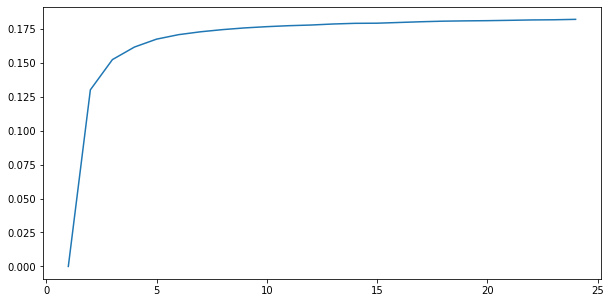

In [1093]:
plt.plot(range(1,25),res)

In [1094]:
model = [KNeighborsRegressor(n_neighbors=1),KNeighborsRegressor(n_neighbors=2), KNeighborsRegressor(n_neighbors=3)]
j = 1
for i in model:
    print(i)
    model_fit(i, train_X, train_y, test_X.drop(columns='Employee_ID'), sample_submission, str(i)+str(j)+".csv")
    j+=1

KNeighborsRegressor(n_neighbors=1)
Train RMSE :  0.0
KNeighborsRegressor(n_neighbors=2)
Train RMSE :  0.12998932008877828
KNeighborsRegressor(n_neighbors=3)
Train RMSE :  0.15225263110974888
